When diagonalizing the constraint, I have been performing an Eigendecomposition of $N_3^\top N_3$. But I know this matrix has at most $k$ (no. of time steps) non-zero Eigenvalues, so I can save time by finding the SVD of $N_3$ instead.

Using `svds`, an iterative method, and asking for $k$ singular values/vectors will give me a basis for the range of the matrix. To complete the basis, I can 

## Testing


In [ ]:
include("../src/TemporalInstanton.jl")
using TemporalInstanton, JLD

In [1]:
addprocs(2) # vary number of concurrent processes here
@everywhere include("../src/TemporalInstanton.jl")
@everywhere include("../src/mat2tmpinst.jl")
@everywhere using TemporalInstanton

In [2]:
i = testcase("timing")
@time o = solve_temporal_instanton(i);
sort(o.score)

r=0 check: 	removing 1 lines
ISF pre-check: 	removing lines Int64[]


ERROR (unhandled task failure): On worker 3:
ArgumentError: reducing over an empty collection is not allowed
 in _mapreduce at reduce.jl:137
 in solvesecular at /home/jkersulis/Documents/Dropbox/InstantonAnew/Jonas Edits/Time-Coupled Instanton/temporal-instanton/src/manipulations.jl:221
 in solve_instanton_qcqp at /home/jkersulis/Documents/Dropbox/InstantonAnew/Jonas Edits/Time-Coupled Instanton/temporal-instanton/src/solvetmpinst.jl:150
 [inlined code] from /home/jkersulis/Documents/Dropbox/InstantonAnew/Jonas Edits/Time-Coupled Instanton/temporal-instanton/src/solvetmpinst.jl:289
 in anonymous at no file:286
 in anonymous at multi.jl:892
 in run_work_thunk at multi.jl:645
 [inlined code] from multi.jl:892
 in anonymous at task.jl:63
 in remotecall_fetch at multi.jl:731
 in remotecall_fetch at multi.jl:734
 in anonymous at multi.jl:1485


LoadError: LoadError: On worker 2:
ArgumentError: reducing over an empty collection is not allowed
 in _mapreduce at reduce.jl:137
 in solvesecular at /home/jkersulis/Documents/Dropbox/InstantonAnew/Jonas Edits/Time-Coupled Instanton/temporal-instanton/src/manipulations.jl:221
 in solve_instanton_qcqp at /home/jkersulis/Documents/Dropbox/InstantonAnew/Jonas Edits/Time-Coupled Instanton/temporal-instanton/src/solvetmpinst.jl:150
 [inlined code] from /home/jkersulis/Documents/Dropbox/InstantonAnew/Jonas Edits/Time-Coupled Instanton/temporal-instanton/src/solvetmpinst.jl:289
 in anonymous at no file:286
 in anonymous at multi.jl:892
 in run_work_thunk at multi.jl:645
 [inlined code] from multi.jl:892
 in anonymous at task.jl:63
while loading In[2], in expression starting on line 155

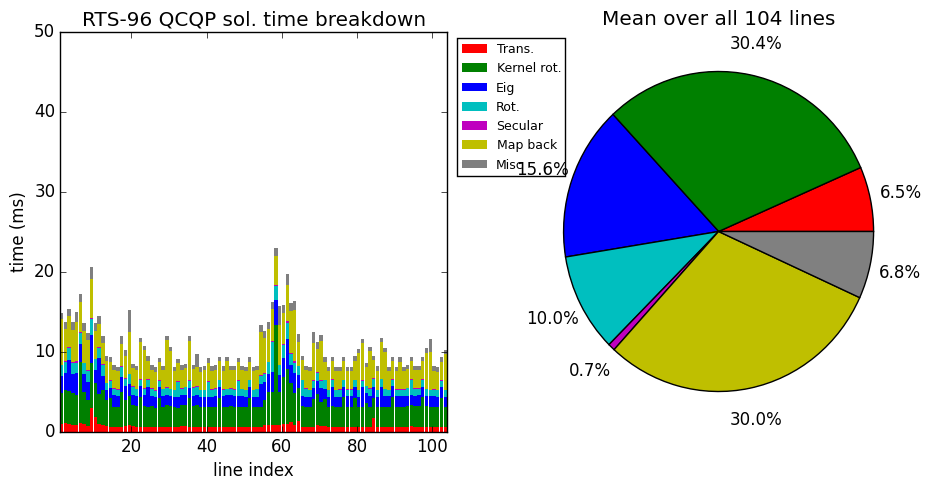

(Any[PyObject <matplotlib.patches.Wedge object at 0x7f6ad5e2ef60>,PyObject <matplotlib.patches.Wedge object at 0x7f6ad5de7278>,PyObject <matplotlib.patches.Wedge object at 0x7f6ad5ded470>,PyObject <matplotlib.patches.Wedge object at 0x7f6ad5df5668>,PyObject <matplotlib.patches.Wedge object at 0x7f6ad5df9860>,PyObject <matplotlib.patches.Wedge object at 0x7f6ad5e00a58>,PyObject <matplotlib.patches.Wedge object at 0x7f6ad5e05c50>],Any[PyObject <matplotlib.text.Text object at 0x7f6ad5e23780>,PyObject <matplotlib.text.Text object at 0x7f6ad5de7a20>,PyObject <matplotlib.text.Text object at 0x7f6ad5dedc18>,PyObject <matplotlib.text.Text object at 0x7f6ad5df5e10>,PyObject <matplotlib.text.Text object at 0x7f6ad5df9f28>,PyObject <matplotlib.text.Text object at 0x7f6ad5e05240>,PyObject <matplotlib.text.Text object at 0x7f6ad5e0d438>],Any[PyObject <matplotlib.text.Text object at 0x7f6ad5e2b2e8>,PyObject <matplotlib.text.Text object at 0x7f6ad5de7ef0>,PyObject <matplotlib.text.Text object at 0x7f

In [7]:
using PyPlot
PyPlot.svg(true)

t = load("../data/timing.jld")["timeVecs"]

tTrans    = [ti[1] for ti in t]*1e3
tKern     = [ti[2] for ti in t]*1e3
tEig      = [ti[3] for ti in t]*1e3
tRot      = [ti[4] for ti in t]*1e3
tSec      = [ti[5] for ti in t]*1e3
tMap      = [ti[6] for ti in t]*1e3
misc = o.linetimes*1e3 - (tMap+tSec+tRot+tEig+tKern+tTrans)

xvals = collect(1:length(tTrans))

fig = figure(figsize=(11,5))
subplot(1,2,1)
title("RTS-96 QCQP sol. time breakdown")
axis([1;length(xvals);0;50])
xlabel("line index")
ylabel("time (ms)")

bar(xvals, tTrans, color = "r", linewidth=0, width=0.9)
bar(xvals, tKern,  color = "g", bottom = tTrans, linewidth=0, width=0.9)
bar(xvals, tEig,   color = "b", bottom = tKern+tTrans, linewidth=0, width=0.9)
bar(xvals, tRot,   color = "c", bottom = tEig+tKern+tTrans, linewidth=0, width=0.9)
bar(xvals, tSec,   color = "m", bottom = tRot+tEig+tKern+tTrans, linewidth=0, width=0.9)
bar(xvals, tMap,   color = "y", bottom = tSec+tRot+tEig+tKern+tTrans, linewidth=0, width=0.9)
bar(xvals, misc,   color = "k", bottom = tMap+tSec+tRot+tEig+tKern+tTrans, linewidth=0,width=0.9, alpha=0.5)

labels = ["Trans.";
    "Kernel rot.";
    "Eig";
    "Rot.";
    "Secular";
    "Map back";
    "Misc"]

legend(labels,loc=1,ncol=1,fontsize=9,
bbox_to_anchor=(1.32, 1.0))

subplot(1,2,2)
title("Mean over all 104 lines")
sizes = [mean(tTrans);
    mean(tKern);
    mean(tEig);
    mean(tRot);
    mean(tSec);
    mean(tMap);
    mean(misc)]
scale!(sizes,1/sum(sizes))

colors = ["r";
    "g";
    "b";
    "c";
    "m";
    "y";
    "gray"]

pie(sizes, colors=colors, autopct="%1.1f%%", pctdistance=1.2)
# tight_layout()
# savefig("../images/2015-11-09-timing-analysis-eig-N3.pdf")

In [3]:
T = 6
Qeig = load("Qeig.jld")
Qc = Qeig["Qc"]
N = Qeig["N"]
D = Qeig["D"]
U = Qeig["U"]
Qconstr = Qeig["Qconstr"]
N3 = N[end-T+1:end,:]

6x108 sparse matrix with 108 Float64 entries:
	[1  ,   1]  =  -0.000999709
	[1  ,   2]  =  2.48208e-5
	[1  ,   3]  =  -2.21178e-5
	[1  ,   4]  =  -0.000409797
	[1  ,   5]  =  0.000269907
	[1  ,   6]  =  0.000140234
	[1  ,   7]  =  -0.00190038
	[1  ,   8]  =  0.000821389
	[1  ,   9]  =  -0.000503173
	[1  ,  10]  =  -0.000341885
	⋮
	[6  ,  98]  =  0.00955154
	[6  ,  99]  =  -0.00585122
	[6  , 100]  =  -0.00396942
	[6  , 101]  =  0.00214507
	[6  , 102]  =  -0.0155194
	[6  , 103]  =  0.0015368
	[6  , 104]  =  -0.00453794
	[6  , 105]  =  0.00244711
	[6  , 106]  =  0.00160769
	[6  , 107]  =  -0.000602085
	[6  , 108]  =  0.0033466

In [4]:
Dt,Ut = eig(full(Qconstr))
Us,Ss,Vs = svd(full(Qconstr))
Us,Ss,Vs = svd(full(N3'),thin=false)

(
108x108 Array{Float64,2}:
  0.0        0.0  0.0  0.0  0.0  -0.352408    …   0.000903478  -0.00502185 
  0.0        0.0  0.0  0.0  0.0   0.0087496      -5.84518e-6    3.24896e-5 
  0.0        0.0  0.0  0.0  0.0  -0.00779675      5.20863e-6   -2.89514e-5 
  0.0        0.0  0.0  0.0  0.0  -0.144458        9.65054e-5   -0.000536411
  0.0        0.0  0.0  0.0  0.0   0.0951451      -6.35619e-5    0.000353299
  0.0        0.0  0.0  0.0  0.0   0.0494342   …   0.0182434    -0.101403   
  0.0        0.0  0.0  0.0  0.0  -0.669905        0.000447531  -0.00248754 
  0.0        0.0  0.0  0.0  0.0   0.289549       -0.000193433   0.00107517 
  0.0        0.0  0.0  0.0  0.0  -0.177374        0.000118495  -0.000658637
  0.0        0.0  0.0  0.0  0.0  -0.120518        8.05123e-5   -0.000447516
  0.0        0.0  0.0  0.0  0.0   0.0652392   …  -4.35832e-5    0.000242251
  0.0        0.0  0.0  0.0  0.0  -0.470249        0.000314151  -0.00174616 
  0.0        0.0  0.0  0.0  0.0   0.0468128      -3.12734e-5

In [10]:
?svd

search: 

```
svd(A, B) -> U, V, Q, D1, D2, R0
```

Wrapper around `svdfact` extracting all parts the factorization to a tuple. Direct use of `svdfact` is therefore generally more efficient. The function returns the generalized SVD of `A` and `B`, returning `U`, `V`, `Q`, `D1`, `D2`, and `R0` such that `A = U*D1*R0*Q'` and `B = V*D2*R0*Q'`.

```
svd(A, [thin=true]) -> U, S, V
```

Wrapper around `svdfact` extracting all parts the factorization to a tuple. Direct use of `svdfact` is therefore generally more efficient. Computes the SVD of `A`, returning `U`, vector `S`, and `V` such that `A == U*diagm(S)*V'`. If `thin` is `true`, an economy mode decomposition is returned. The default is to produce a thin decomposition.


svd svds svdvals svdfact svdvals! svdfact! isvalid is_valid_utf8

